# Meu portfólio

<b>Aqui estará concentrada toda analise do meu portfólio pessoal.</b>

## Taxa de retorno

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickets = ['BIDI4.SA','MGLU3.SA','ALPA4.SA']

meu_portfolio = pd.DataFrame()

for t in tickets:
    meu_portfolio[t] = wb.DataReader(t, data_source='yahoo', start='2019-1-3')['Adj Close']

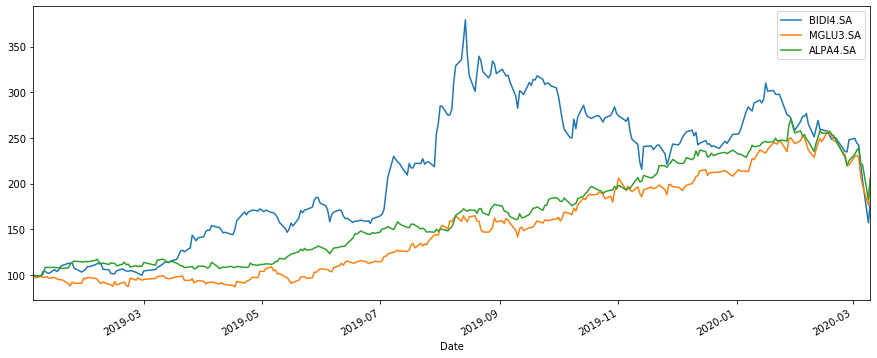

In [3]:
(meu_portfolio / meu_portfolio.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

### Versus Bovespa

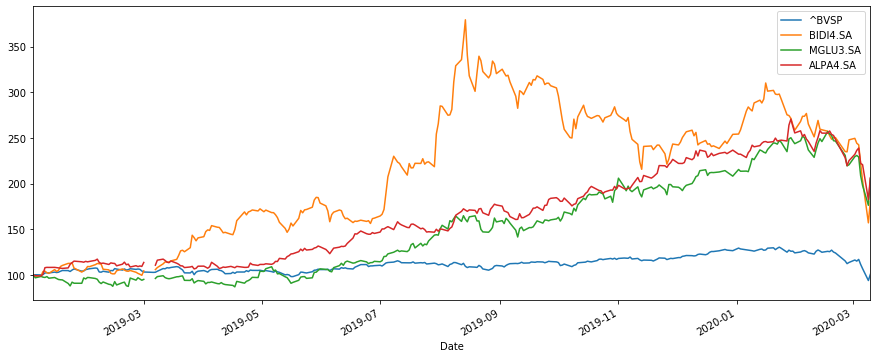

In [4]:
tickets_indice = ['^BVSP', 'BIDI4.SA','MGLU3.SA','ALPA4.SA']

data_2 = pd.DataFrame()

for t in tickets_indice:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2019-1-3')['Adj Close']
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

### Retorno anual por ativo

In [5]:
ind_returns = (meu_portfolio / meu_portfolio.shift(1)) - 1

annual_returns = ind_returns.mean() * 250

annual_returns

BIDI4.SA    0.685036
MGLU3.SA    0.719288
ALPA4.SA    0.690711
dtype: float64

### Retorno anual do portfolio

In [6]:
weights = np.array([0.27,0.36,0.35])

'{}% ao ano'.format(round(np.dot(annual_returns, weights),5) * 100)

'68.565% ao ano'

## Taxa de risco

### Volatilidade dos ativos (o quanto esse ativo muda)

 - std() é o desvio padrão, que vem com a raiz da variância

In [14]:
ind_returns[tickets].std() * 250 ** 0.5

BIDI4.SA    0.600628
MGLU3.SA    0.456472
ALPA4.SA    0.369118
dtype: float64

### Variancia do portfólio

In [54]:
pfolio_var = np.dot(weights.T, np.dot(ind_returns.cov() * 250, weights))
print (str(round(pfolio_var, 4) * 100) + ' %')

13.28 %


### Volatilidade do portfólio

In [53]:
pfolio_vol = (np.dot(weights.T, np.dot(ind_returns.cov() * 250, weights))) ** 0.5
print (str(round(pfolio_vol, 4) * 100) + ' % de volatividade')

36.44 % de volatividade


## Covariancia e Correlação

### Covariancia diaria

In [9]:
ind_returns.cov()

BIDI4.SA  MGLU3.SA  ALPA4.SA
BIDI4.SA  0.001443  0.000446  0.000402
MGLU3.SA  0.000446  0.000833  0.000352
ALPA4.SA  0.000402  0.000352  0.000545

### Covariância anual

In [10]:
ind_returns.cov() * 250

BIDI4.SA  MGLU3.SA  ALPA4.SA
BIDI4.SA  0.360754  0.111414  0.100519
MGLU3.SA  0.111414  0.208367  0.087964
ALPA4.SA  0.100519  0.087964  0.136248

### Correlação

 - Essa tabela não precisa ser anualizada (multiplicada por 250)

In [11]:
ind_returns.corr()

BIDI4.SA  MGLU3.SA  ALPA4.SA
BIDI4.SA  1.000000  0.406367  0.453395
MGLU3.SA  0.406367  1.000000  0.522066
ALPA4.SA  0.453395  0.522066  1.000000

## Risco diversificável

Risco diversificável = variancia do portfólio - variancia anual ponderada

In [43]:
bidi, maglu, alpa = [(ind_returns[a].var() * 250) for a in tickets]
print(bidi,'\n',maglu,'\n',alpa)

0.360754402783643 
 0.20836691070209687 
 0.13624802499346128


In [46]:
risco_diversificavel = pfolio_var - (weights[0] ** 2 * bidi) - (weights[1] ** 2 * maglu) - (weights[2] ** 2 * alpa)
print (str(round(risco_diversificavel*100, 3)) + ' %')

6.282 %


## Risco não-diversificável

In [50]:
risco_n_sistematico = pfolio_var - risco_diversificavel
print (str(round(risco_n_sistematico*100, 3)) + ' %')

6.999 %
